In [ ]:
!pip install wefe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 3.9 MB/s eta 0:00:00


In [ ]:
from wefe.query import Query
from wefe.word_embedding_model import WordEmbeddingModel
from wefe.metrics import WEAT, RNSB
from wefe.utils import run_queries
from wefe.datasets import load_weat
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LOAD THE WORD VECTOR**

In [ ]:
w2v_embeddings = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/fp/wiki.ta.vec")
fasttextwiki = WordEmbeddingModel(w2v_embeddings, 'fasttextwiki')

# **WEAT**

In [ ]:
from wefe.utils import run_queries

query = Query(
              target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி ', 'அக்கா', 'அவள்'],
                             ['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்', 'அண்ணா', 'அவன்']
                             ],          
              attribute_sets =[['வீடு', 'பெற்றோர்', 'குழந்தைகள்', 'குடும்பம்', 'உறவினர்கள்', 'திருமணம்'],
                               ['நிர்வாகி', 'மேலாண்மை', 'தொழில்முறை', 'நிறுவனம்', 'சம்பளம்', 'அலுவலகம்'],
                              ],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['Family', 'Career'],
)

query2 = Query(
            target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்'],['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை']],
              attribute_sets =[['செவிலியர்', 'ஒப்பனையாளர்', 'நடனமாடுபவர்', 'கைவினை', 'பணிப்பெண்'],
                               ['மருத்துவர்', 'பொறியாளர்', 'காவல்', 'சிப்பாய்','வேட்டைக்காரன்'],
                              ],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['F_Professions','M_Professions'],
)

query3 = Query(
    
              target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி ', 'அக்கா', 'அவள்'],
                             ['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்', 'அண்ணா', 'அவன்']
                             ],
              attribute_sets =[['கவிதை', 'கலை', 'நடனம்', 'இலக்கியம்', 'நாவல்', 'சிம்பொனி', 'நாடகம்', 'சிற்பம்'],
                               ['கணிதம்', 'இயற்கணிதம்', 'வடிவியல்', 'கால்குலஸ்', 'சமன்பாடுகள்', 'கணக்கீடு', 'எண்கள்', 'கூட்டல்'],
                              ],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['Arts','Maths'],    
)


queries= [query,query2,query3]
WEAT_gender_results = run_queries(
    WEAT, queries, [fasttextwiki], queries_set_name="Gender Queries", metric_params={ "return_effect_size": True}
)
print(WEAT_gender_results)

query_name    Female Terms and Male Terms wrt Family and Career  \
model_name                                                        
fasttextwiki                                           0.869395   

query_name    Female Terms and Male Terms wrt F_Professions and M_Professions  \
model_name                                                                      
fasttextwiki                                           0.130026                 

query_name    Female Terms and Male Terms wrt Arts and Maths  
model_name                                                    
fasttextwiki                                        0.892889  


# **RND**

In [ ]:
from wefe.metrics import RND
qquery = Query(
                target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி'],['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்']],
              attribute_sets =[['வீடு', 'பெற்றோர்', 'குழந்தைகள்', 'குடும்பம்', 'உறவினர்கள்', 'திருமணம்'],],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['Family'],
)

qquery2 = Query(
            target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி'],['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்']],
              attribute_sets =[['செவிலியர்', 'ஒப்பனையாளர்', 'நடனமாடுபவர்', 'கைவினை', 'பணிப்பெண்'],],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['F_Professions'],
)

qquery3 = Query(
    
              target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி'],['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்']],
              attribute_sets =[['கவிதை', 'கலை', 'நடனம்', 'இலக்கியம்', 'நாவல்', 'சிம்பொனி', 'நாடகம்', 'சிற்பம்'],],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['Arts'],


    
)

qqueries= [qquery,qquery2,qquery3]
RND_gender_results = run_queries(
    RND, qqueries, [fasttextwiki], queries_set_name="Gender Queries"
)
print(RND_gender_results)


query_name    Female Terms and Male Terms wrt Family  \
model_name                                             
fasttextwiki                               -0.036351   

query_name    Female Terms and Male Terms wrt F_Professions  \
model_name                                                    
fasttextwiki                                       0.097649   

query_name    Female Terms and Male Terms wrt Arts  
model_name                                          
fasttextwiki                              0.198213  


# **ECT**

In [ ]:
from wefe.metrics import ECT
qquery = Query(
                target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி'],['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்']],
              attribute_sets =[['வீடு', 'பெற்றோர்', 'குழந்தைகள்', 'குடும்பம்', 'உறவினர்கள்', 'திருமணம்'],],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['Family'],
)

qquery2 = Query(
            target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி'],['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்']],
              attribute_sets =[['செவிலியர்', 'ஒப்பனையாளர்', 'நடனமாடுபவர்', 'கைவினை', 'பணிப்பெண்'],],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['F_Professions'],
)

qquery3 = Query(
    
              target_sets = [['பெண்', 'அம்மா', 'ராணி', 'மகள்', 'தாய்', 'தலைவி'],['ஆண்', 'அப்பா', 'ராஜா', 'மகன்', 'தந்தை', 'தலைவன்']],
              attribute_sets =[['கவிதை', 'கலை', 'நடனம்', 'இலக்கியம்', 'நாவல்', 'சிம்பொனி', 'நாடகம்', 'சிற்பம்'],],
              target_sets_names = ['Female Terms', 'Male Terms'],
              attribute_sets_names = ['Arts'],


    
)

qqueries= [qquery,qquery2,qquery3]
ECT_gender_results = run_queries(
    ECT, qqueries, [fasttextwiki], queries_set_name="Gender Queries"
)
print(ECT_gender_results)


query_name    Female Terms and Male Terms wrt Family  \
model_name                                             
fasttextwiki                                0.657143   

query_name    Female Terms and Male Terms wrt F_Professions  \
model_name                                                    
fasttextwiki                                            0.3   

query_name    Female Terms and Male Terms wrt Arts  
model_name                                          
fasttextwiki                                   0.5  


# **DEBIAS**

In [ ]:
from wefe.datasets import fetch_debiaswe
from wefe.debias.hard_debias import HardDebias

debiaswe_wordsets = fetch_debiaswe()

definitional_pairs = [['பெண்','ஆண்'],['அவள்','அவன்'], ['அம்மா','அப்பா'], ['மகள்','மகன்'], ['திருமதி','திரு'] ]

equalize_pairs = [['மடம்', 'கான்வென்ட்'], ['பூசாரி', 'கன்னியாஸ்திரி'], ['அப்பா', 'அம்மா'],['ஆண்கள்', 'பெண்கள்'], ['தாத்தா', 'பாட்டி'], ['பேரன்கள்', 'பேத்திகள்'],
['மாமா', 'அத்தை'], ['மனைவிகள்', 'கணவர்கள்'], ['அவன்', 'அவள்'], ['பையன்', 'பெண்'], ['சிறுவர்கள்', 'பெண்கள்'], ['சகோதரன்', 'சகோதரி'], ['சகோதரர்கள்', 'சகோதரிகள்'], ['அப்பாக்கள்', 'அம்மாக்கள்'], ['தந்தைமை', 'தாய்மை'],
['அப்பா', 'அம்மா'], ['ராஜா', 'ராணி'], ['ராஜாக்கள்', 'ராணிகள்'], ['ஆண்', 'பெண்'], ['ஆண்கள்', 'பெண்கள்'], ['மருமகன்', 'மருமகள்'], ['இளவரசன்', 'இளவரசி'], 
['மகன்', 'மகள்'], ['மகன்கள்', 'மகள்கள்'], ['இரட்டை_சகோதரன்', 'இரட்டை_சகோதரி']]


gender_specific =['அவன்', 'அவள்','பெண்கள்', 'ஆண்கள்', 'அவரது', 'பெண்','மனைவி', 'தன்னை', 'அம்மா', 'அப்பா', 'தலைவர்', 'மகள்', 'கணவன்', 'பையன்', 
                  'ராஜா', 'சிறுவர்கள்', 'சகோதரன்', 'பேச்சாளர்', 'சகோதரி', 'ஆண்', 'சிங்கங்கள் ', 'சகோதரர்கள்', 'நடிகை', 'மகன்கள்', 'காதலி', 'ராஜாக்கள்', 'மகள்கள்', 'இளவரசன்', 'ராணி',
                  'காளைகள்', 'காதலன்', 'சகோதரிகள்', 'அம்மாக்கள்', 'சார்', 'தொழிலதிபர்', 'பாட்டி', 'தாத்தா', 'மான்', 'மாமா', 'ராணிகள்', 'பேரன்', 'இரட்டையர்கள்',
                  'மனைவிகள்', 'விதவை', 'மருமகன்', 'மணமகள்', 'தந்தைகள்', 'கன்னி', 'பேத்தி', 'பேத்திகள்', 'பேரன்கள்', 'இளங்கலை', 'கணவர்கள்', 'தாடி', 'மாற்றாந்தாய்']
            
print(f"definitional_pairs: \n{definitional_pairs}")
print(f"equalize_pairs: \n{equalize_pairs}")
print(f"gender_specific: \n{gender_specific}")
print("-" * 70, "\n")


definitional_pairs: 
[['பெண்', 'ஆண்'], ['அவள்', 'அவன்'], ['அம்மா', 'அப்பா'], ['மகள்', 'மகன்'], ['திருமதி', 'திரு']]
equalize_pairs: 
[['மடம்', 'கான்வென்ட்'], ['பூசாரி', 'கன்னியாஸ்திரி'], ['அப்பா', 'அம்மா'], ['ஆண்கள்', 'பெண்கள்'], ['தாத்தா', 'பாட்டி'], ['பேரன்கள்', 'பேத்திகள்'], ['மாமா', 'அத்தை'], ['மனைவிகள்', 'கணவர்கள்'], ['அவன்', 'அவள்'], ['பையன்', 'பெண்'], ['சிறுவர்கள்', 'பெண்கள்'], ['சகோதரன்', 'சகோதரி'], ['சகோதரர்கள்', 'சகோதரிகள்'], ['அப்பாக்கள்', 'அம்மாக்கள்'], ['தந்தைமை', 'தாய்மை'], ['அப்பா', 'அம்மா'], ['ராஜா', 'ராணி'], ['ராஜாக்கள்', 'ராணிகள்'], ['ஆண்', 'பெண்'], ['ஆண்கள்', 'பெண்கள்'], ['மருமகன்', 'மருமகள்'], ['இளவரசன்', 'இளவரசி'], ['மகன்', 'மகள்'], ['மகன்கள்', 'மகள்கள்'], ['இரட்டை_சகோதரன்', 'இரட்டை_சகோதரி']]
gender_specific: 
['அவன்', 'அவள்', 'பெண்கள்', 'ஆண்கள்', 'அவரது', 'பெண்', 'மனைவி', 'தன்னை', 'அம்மா', 'அப்பா', 'தலைவர்', 'மகள்', 'கணவன்', 'பையன்', 'ராஜா', 'சிறுவர்கள்', 'சகோதரன்', 'பேச்சாளர்', 'சகோதரி', 'ஆண்', 'சிங்கங்கள் ', 'சகோதரர்கள்', 'நடிகை', 'மகன்கள்', 'காதலி', 'ராஜாக்கள்'

In [ ]:
hd = HardDebias(verbose=False, criterion_name="gender")
hd.fit(
    fasttextwiki, definitional_pairs=definitional_pairs, equalize_pairs=equalize_pairs,
)
gender_debiased_model = hd.transform(fasttextwiki, ignore=gender_specific, copy=True)


Copy argument is True. Transform will attempt to create a copy of the original model. This may fail due to lack of memory.


Model copy created successfully.


100%|██████████| 245402/245402 [00:05<00:00, 42651.68it/s]


# **DEBIAS - MEASURING AGAINST WEAT**

In [ ]:
WEAT_gender_results = run_queries(
    WEAT, queries, [fasttextwiki,gender_debiased_model], queries_set_name="Gender Queries"
)
WEAT_eff = run_queries(
    WEAT, queries, [fasttextwiki,gender_debiased_model ], queries_set_name="Gender Queries",
    metric_params={ "return_effect_size": True},  

)
#print(WEAT_gender_results)
print(WEAT_eff)

query_name                    Female Terms and Male Terms wrt Family and Career  \
model_name                                                                        
fasttextwiki                                                           0.869395   
fasttextwiki_gender_debiased                                           0.508762   

query_name                    Female Terms and Male Terms wrt F_Professions and M_Professions  \
model_name                                                                                      
fasttextwiki                                                           0.130026                 
fasttextwiki_gender_debiased                                           0.012435                 

query_name                    Female Terms and Male Terms wrt Arts and Maths  
model_name                                                                    
fasttextwiki                                                        0.892889  
fasttextwiki_gender_debiased             

# **DEBIAS - MEASURING AGAINST RND**

In [ ]:
queries= [qquery,qquery2,qquery3]
RND_gender_results = run_queries(
    RND, queries, [fasttextwiki, gender_debiased_model ], queries_set_name="Gender Queries"
)
print(RND_gender_results)

query_name                    Female Terms and Male Terms wrt Family  \
model_name                                                             
fasttextwiki                                               -0.036351   
fasttextwiki_gender_debiased                               -0.010862   

query_name                    Female Terms and Male Terms wrt F_Professions  \
model_name                                                                    
fasttextwiki                                                       0.097649   
fasttextwiki_gender_debiased                                      -0.001277   

query_name                    Female Terms and Male Terms wrt Arts  
model_name                                                          
fasttextwiki                                              0.198213  
fasttextwiki_gender_debiased                             -0.001389  


# **DEBIAS - MEASURING AGAINST ECT**

In [ ]:
queries= [qquery,qquery2,qquery3]
ECT_gender_results = run_queries(
    ECT, queries, [fasttextwiki, gender_debiased_model], queries_set_name="Gender Queries"
)
print(ECT_gender_results)

query_name                    Female Terms and Male Terms wrt Family  \
model_name                                                             
fasttextwiki                                                0.657143   
fasttextwiki_gender_debiased                                1.000000   

query_name                    Female Terms and Male Terms wrt F_Professions  \
model_name                                                                    
fasttextwiki                                                            0.3   
fasttextwiki_gender_debiased                                            0.9   

query_name                    Female Terms and Male Terms wrt Arts  
model_name                                                          
fasttextwiki                                              0.500000  
fasttextwiki_gender_debiased                              0.666667  


# **VISUALIZATION**

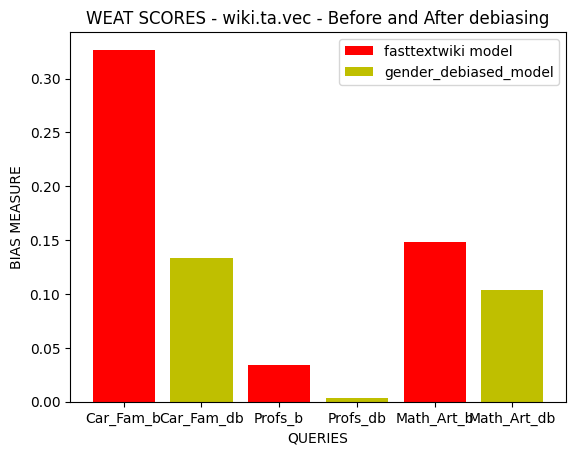

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# x1 = [1, 3, 5]
# # y1 = [weat biased familycareer, weat biased profs, weat biased matharts]
# y1 = [0.393, 0.528, 0.061]

# x2 = [2, 4, 6]
# # y2 = [weat debiased familycareer, weat debiased profs, weat debiased matharts]
# y2 = [0.182, 0.362, 0.022]

x1 = np.array(["Car_Fam_b"])
y1 = [0.327]

x2 = np.array(["Car_Fam_db"])
y2 = [0.133]

x3 = np.array(["Profs_b"])
y3 = [0.034]

x4 = np.array(["Profs_db"])
y4 = [0.0031]

x5 = np.array(["Math_Art_b"])
y5 = [0.148]

x6 = np.array(["Math_Art_db"])
y6 = [0.104]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="fasttextwiki model ", color='r') #rnd biased - b, c #ect biased - m, g
plt.bar(x2, y2, label="gender_debiased_model", color='y')
plt.bar(x3, y3, color='r')
plt.bar(x4, y4, color='y')
plt.bar(x5, y5, color='r')
plt.bar(x6, y6, color='y')
plt.plot()
plt.xlabel("QUERIES")
plt.ylabel("BIAS MEASURE")
plt.title("WEAT SCORES - wiki.ta.vec - Before and After debiasing")
plt.legend()
plt.show()

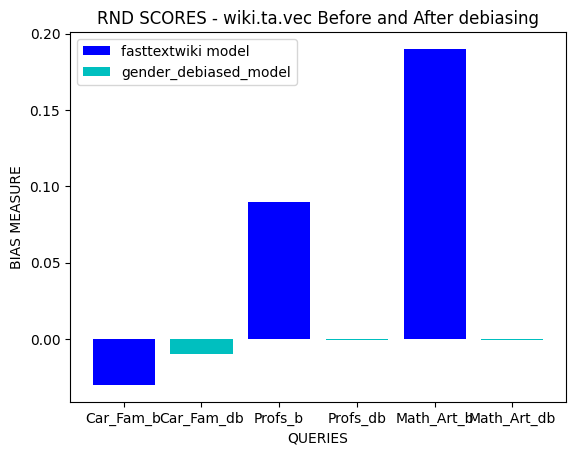

In [ ]:
import matplotlib.pyplot as plt


x1 = np.array(["Car_Fam_b"])
y1 = [0-.03]

x2 = np.array(["Car_Fam_db"])
y2 = [-0.01]

x3 = np.array(["Profs_b"])
y3 = [0.09]

x4 = np.array(["Profs_db"])
y4 = [-0.001]

x5 = np.array(["Math_Art_b"])
y5 = [0.19]

x6 = np.array(["Math_Art_db"])
y6 = [-0.001]

plt.bar(x1, y1, label="fasttextwiki model ", color='b') #rnd biased - b, c #ect biased - m, g
plt.bar(x2, y2, label="gender_debiased_model", color='c')
plt.bar(x3, y3, color='b')
plt.bar(x4, y4, color='c')
plt.bar(x5, y5, color='b')
plt.bar(x6, y6, color='c')
plt.plot()
plt.xlabel("QUERIES")
plt.ylabel("BIAS MEASURE")
plt.title("RND SCORES - wiki.ta.vec Before and After debiasing")
plt.legend()
plt.show()

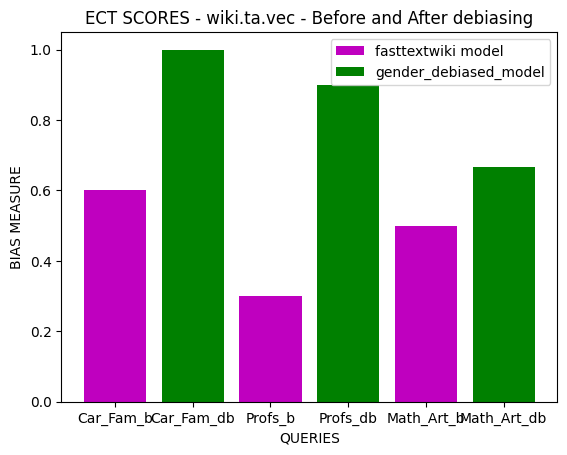

In [ ]:
import matplotlib.pyplot as plt


x1 = np.array(["Car_Fam_b"])
y1 = [0.6]

x2 = np.array(["Car_Fam_db"])
y2 = [1]

x3 = np.array(["Profs_b"])
y3 = [0.3]

x4 = np.array(["Profs_db"])
y4 = [0.9]

x5 = np.array(["Math_Art_b"])
y5 = [0.5]

x6 = np.array(["Math_Art_db"])
y6 = [0.666]

plt.bar(x1, y1, label="fasttextwiki model ", color='m') #rnd biased - b, c #ect biased - m, g
plt.bar(x2, y2, label="gender_debiased_model", color='g')
plt.bar(x3, y3, color='m')
plt.bar(x4, y4, color='g')
plt.bar(x5, y5, color='m')
plt.bar(x6, y6, color='g')
plt.plot()
plt.xlabel("QUERIES")
plt.ylabel("BIAS MEASURE")
plt.title("ECT SCORES - wiki.ta.vec - Before and After debiasing")
plt.legend()
plt.show()

